# POGOH Station Location 

Here we imported necessary libraries, which reads the CSV file of station locations into a pandas DataFrame. It then defines a helper function, latlon_to_neighborhood, which uses fp.geo_to_neighborhood to map each station’s geographic coordinates to a Pittsburgh neighborhood. This function is applied across all rows of the dataset, creating a new Neighborhood column. Finally, the code displays the first 60 rows so the updated dataset—with neighborhood labels—can be reviewed.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets as fp

# Load your pogo station dataset
pogoh_data = pd.read_csv("pogoh-station-locations-october-2025.csv")

# Define converter function
def latlon_to_neighborhood(row):
    return fp.geo_to_neighborhood(row['Latitude'], row['Longitude'])

# Apply conversion to each row
pogoh_data['Neighborhood'] = pogoh_data.apply(latlon_to_neighborhood, axis=1)

# Show first rows
pogoh_data.head(60)


,Id,Name,Total Docks,Latitude,Longitude,Neighborhood
0,1,Pierce St & Summerlea St,19,40.456507,-79.932331,Shadyside
1,2,Eliza Furnace Trail & Swineburne St,15,40.425800,-79.953400,Hazelwood
2,3,Centre Ave & Addison St,15,40.444600,-79.978300,Middle Hill
3,4,Burns White Center at 3 Crossings,15,40.456400,-79.980000,Strip District
4,5,Allegheny Station,19,40.448301,-80.018007,Chateau
5,6,10th St & Penn Ave,15,40.444653,-79.996074,Central Business District
6,7,Liberty Ave & Gross St,15,40.459588,-79.945204,Bloomfield
7,8,Glasshouse,15,40.432900,-80.003000,South Shore
8,9,South Side Trail & S 4th St,15,40.431336,-79.995106,South Side Flats
9,10,Zulema St & Coltart Ave,19,40.436055,-79.956827,Central Oakland


In [3]:
pogoh_counts = pogoh_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
pogoh_counts_df = pogoh_counts.rename_axis('Neighborhood').reset_index(name='Number of Pogoh Stations')

pogoh_counts_df



,Neighborhood,Number of Pogoh Stations
0,Central Oakland,7
1,Central Business District,6
2,Shadyside,5
3,South Side Flats,4
4,North Oakland,4
5,Hazelwood,3
6,Bloomfield,3
7,Strip District,3
8,Homewood South,3
9,South Shore,2


After grouping the number of POGOH bike stations per neighborhood, we find the total number of bike docks per neighborhood by counting every dock in specific stations located in the neighborhood.

In [4]:
dock_counts_df = (
    pogoh_data.groupby("Neighborhood")["Total Docks"]
             .sum()
             .rename("Total Number of Docks")
             .reset_index()
)

dock_counts_df.sort_values(by=['Total Number of Docks'], ascending=False).style.hide(axis="index")


Neighborhood,Total Number of Docks
Central Oakland,144
Central Business District,98
North Oakland,88
Shadyside,87
South Side Flats,76
Strip District,53
Bloomfield,49
Hazelwood,49
Homewood South,45
Allegheny Center,38


In [8]:
import folium
import pand
from folium.plugins import HeatMap

# Create base map centered on Pittsburgh
m = folium.Map(location=[40.4406, -79.9959], zoom_start=13)
pogoh_data = pd.read_csv("pogoh-station-locations-october-2025.csv")

# Clean the dataset to remove missing lat/lon/dock values
df_clean = pogoh_data[['Latitude', 'Longitude', 'Total Docks']].dropna()

# Prepare weighted heatmap data
heat_data = df_clean[['Latitude', 'Longitude', 'Total Docks']].values.tolist()

# Add HeatMap layer
HeatMap(
    heat_data,
    radius=25,
    blur=15,
    max_zoom=1
).add_to(m)

m



In [17]:
stations_per_neighborhood = (
    pogoh_data['Neighborhood']
    .value_counts()
    .rename_axis('Neighborhood')
    .reset_index(name='Number of Stations')
)
docks_per_neighborhood = (
    pogoh_data.groupby('Neighborhood')['Total Docks']
    .sum()
    .reset_index(name='Total Docks')
)

In [21]:
dock_density = (
    pogoh_data.groupby('Neighborhood')
    .agg(
        Stations=('Id', 'count'),
        Total_Docks=('Total Docks', 'sum')
    )
)
dock_density['Dock Density'] = dock_density['Total_Docks'] / dock_density['Stations']
dock_density.sort_values(by=['Dock Density'], ascending=False)

,Stations,Total_Docks,Dock Density
Neighborhood,,,
Terrace Village,1,23,23.000000
South Oakland,1,23,23.000000
North Shore,1,23,23.000000
North Oakland,4,88,22.000000
Central Oakland,7,144,20.571429
Crawford-Roberts,1,19,19.000000
Bedford Dwellings,1,19,19.000000
Central Northside,1,19,19.000000
Chateau,1,19,19.000000


We display a bar chart that gives us an idea of which neighborhood has the most POGOH docks per neighborhood

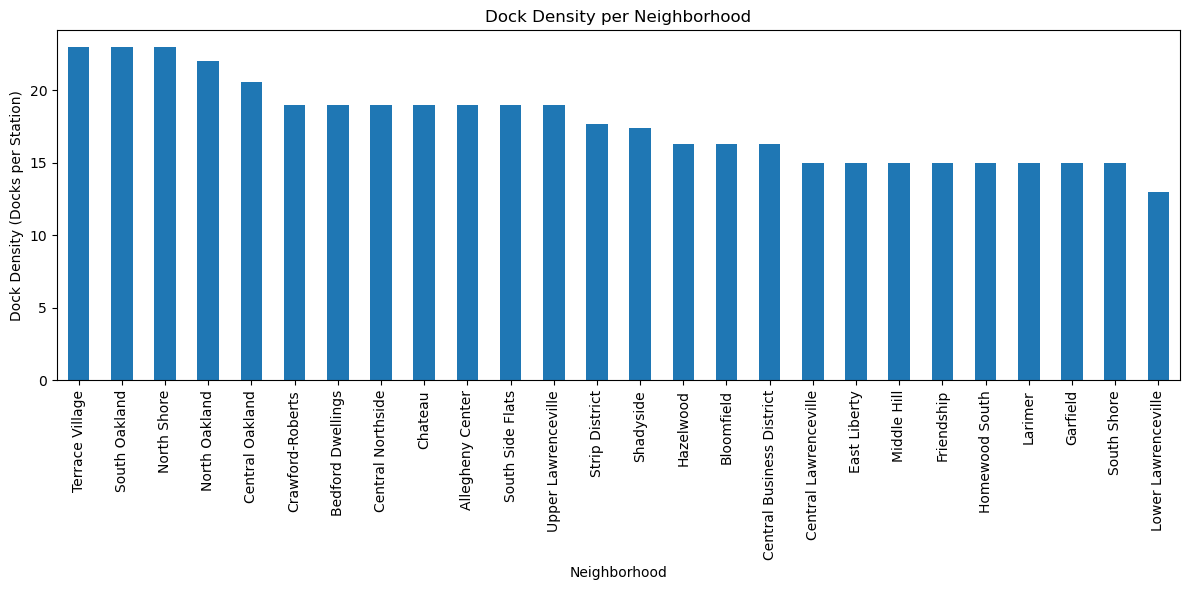

In [24]:
plt.figure(figsize=(12, 6))
dock_density['Dock Density'].sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Dock Density (Docks per Station)")
plt.title("Dock Density per Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Conclusion

Based on the POGOH dock analysis, **Central Oakland** has the highest total number of bike docks in Pittsburgh, while **North Oakland** ranks third in overall dock count. When examining dock density, however, **Terrace Village** stands out with the highest concentration of docks, followed by North Oakland in fourth and Central Oakland in fifth place. Considering both total docks and dock density together, **North Oakland** emerges as the strongest overall neighborhood, offering both a high number of docks and a relatively high density, making it the most well-balanced and accessible area for bike-share users.